# Boston Real Estate Analysis and Prediction with P value

In this notebook, we will use the general steps in the first Boston Real Estate Analysis and Prediction notebook, but instead of split the dataset into training and test data, we will not split the data, will use the original train dataset entirely, to make predictions. The reason being using the p-value process involves generating many many theoretical samples as we add a random error to the linear regression formula.  

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Reference for Linear Regression:
https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

Reference for Feature Engineering:
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#199b
https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

### Data Import and Processing

In [5]:
# Import the training dataset
data = pd.read_csv('data/house-prices-advanced-regression-techniques/train.csv')

df = pd.DataFrame(data)
print('Number of rows and cols for training data: ', str(df.shape))

Number of rows and cols for training data:  (1460, 81)


In [6]:
# since there are 81 columns, set the option in pandas to display all columns to avoid abbreviation
pd.set_option("display.max_columns", None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Feature Engineering 
#### Treatment of Columns with NaN values

reference: https://jamesrledoux.com/code/imputation

In [7]:
# display all rows
pd.set_option('display.max_rows', None)

# columns with NaN values 
print('Number of NaN value in each Column:')
print(df.isna().sum(axis = 0))

Number of NaN value in each Column:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF          

In [8]:
# Lot Frontage: 
# LotFrontage is the Linear feet of street connected to property. NaN values here should be converted to 0.
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [9]:
# MasVnrType and MasVnrArea
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
df['MasVnrType'].unique()

# Since there aren't many NaN values in MasVnrType, the NaN values here will be converted to 'None'. 
# NaN are in MasVnrArea will be converted to 0

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [10]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
bsmt_nulls = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for i in bsmt_nulls:
    print(i, ': ', df[i].unique())

# Convert NaN in ['BsmtQual', 'BsmtCond'] to 'NA' to indicate No Basement


# Convert NaN in ['BsmtExposure'] to 'No' to indicate No Exposure


# Convert NaN in ['BsmtFinType1'] to 'NA' to indicate No Basement


# Convert NaN in ['BsmtFinType2'] to 'NA' to indicate No Basement




BsmtQual :  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [11]:
# FireplaceQu
df['FireplaceQu'].unique()

# Convert NaN in ['FireplaceQu'] to 'NA' to indicate No Fireplace


array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [12]:
# GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
df['GarageType'].unique()

# Convert NaN in ['GarageType'] to 'NA' to indicate No Garage

# Convert NaN in ['GarageYrBlt'] to the ['YearBuilt'] when there is no garage

# Convert NaN in ['GarageFinish'] to 'NA' to indicate No Garage

# Convert NaN in ['GarageQual', 'GarageCond'] to 'NA' to indicate No Garage


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [13]:
# get the columns with 80% NaN values 
col_nas = dict(df.isna().sum(axis = 0))
data_total_rows = df.shape[0]

nan_threshold = 0.8

output_col = {k: v for k, v in col_nas.items() if v/data_total_rows >= nan_threshold}
print(output_col)

output_col_list = list(output_col.keys())
print(output_col_list)

{'Alley': 1369, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
# check unique values in >80% NaN value columns
for i in output_col_list:
    print(i, ': ', df[i].unique())

Alley :  [nan 'Grvl' 'Pave']
PoolQC :  [nan 'Ex' 'Fa' 'Gd']
Fence :  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature :  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [15]:
# Alley 
# For now, NaN in Alley will be converted to a category, 'NoAc' for 'No Access'
df['Alley'] = df['Alley'].fillna('NoAc')
print('Alley: ', df['Alley'].unique())

Alley:  ['NoAc' 'Grvl' 'Pave']


In [16]:
# PoolQC
# Having a Pool might effect the sales price, so transform PoolQC ('pool quality') categorical value to scale might be a good idea
# 0 - no pool; 1 - Fa (fair); 2 - TA (Average/Typical); 3 - Gd (Good); 4 - Ex (Excellent);

In [17]:
# Fence
# Need Categorical Imputing for Fence

In [18]:
# MiscFeature
# Need Categorical Imputing for MiscFeature

In [19]:
# describe the data
df.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,57.62,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,34.66,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,0.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,42.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,63.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,79.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### Feature Correlation

reference: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

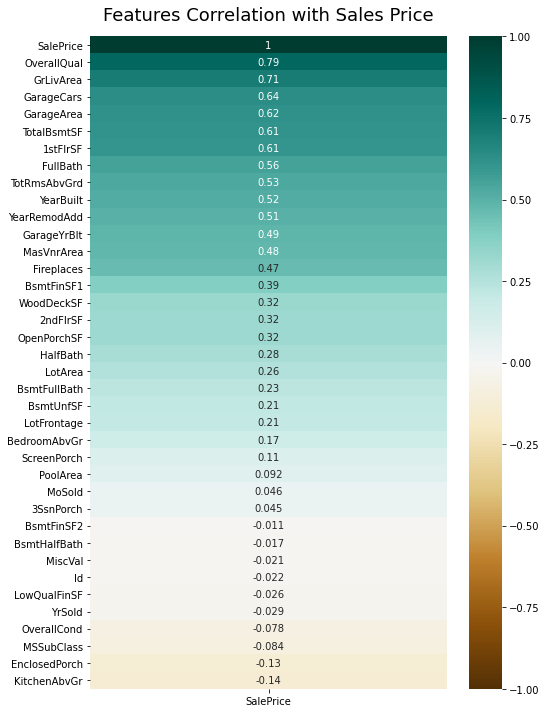

In [20]:
# Feature Correlation with Price
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlation with Sales Price', fontdict={'fontsize':18}, pad=16);

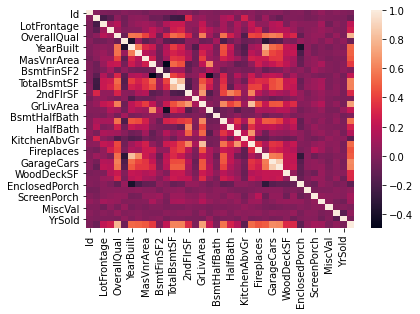

In [21]:
# plot a correlation matrix between variables 
# see if these variables are highly correlated ['TotalBsmtSF','1stFlrSF'], ['GarageCars', 'GarageArea'], etc
sns.heatmap(df.corr())

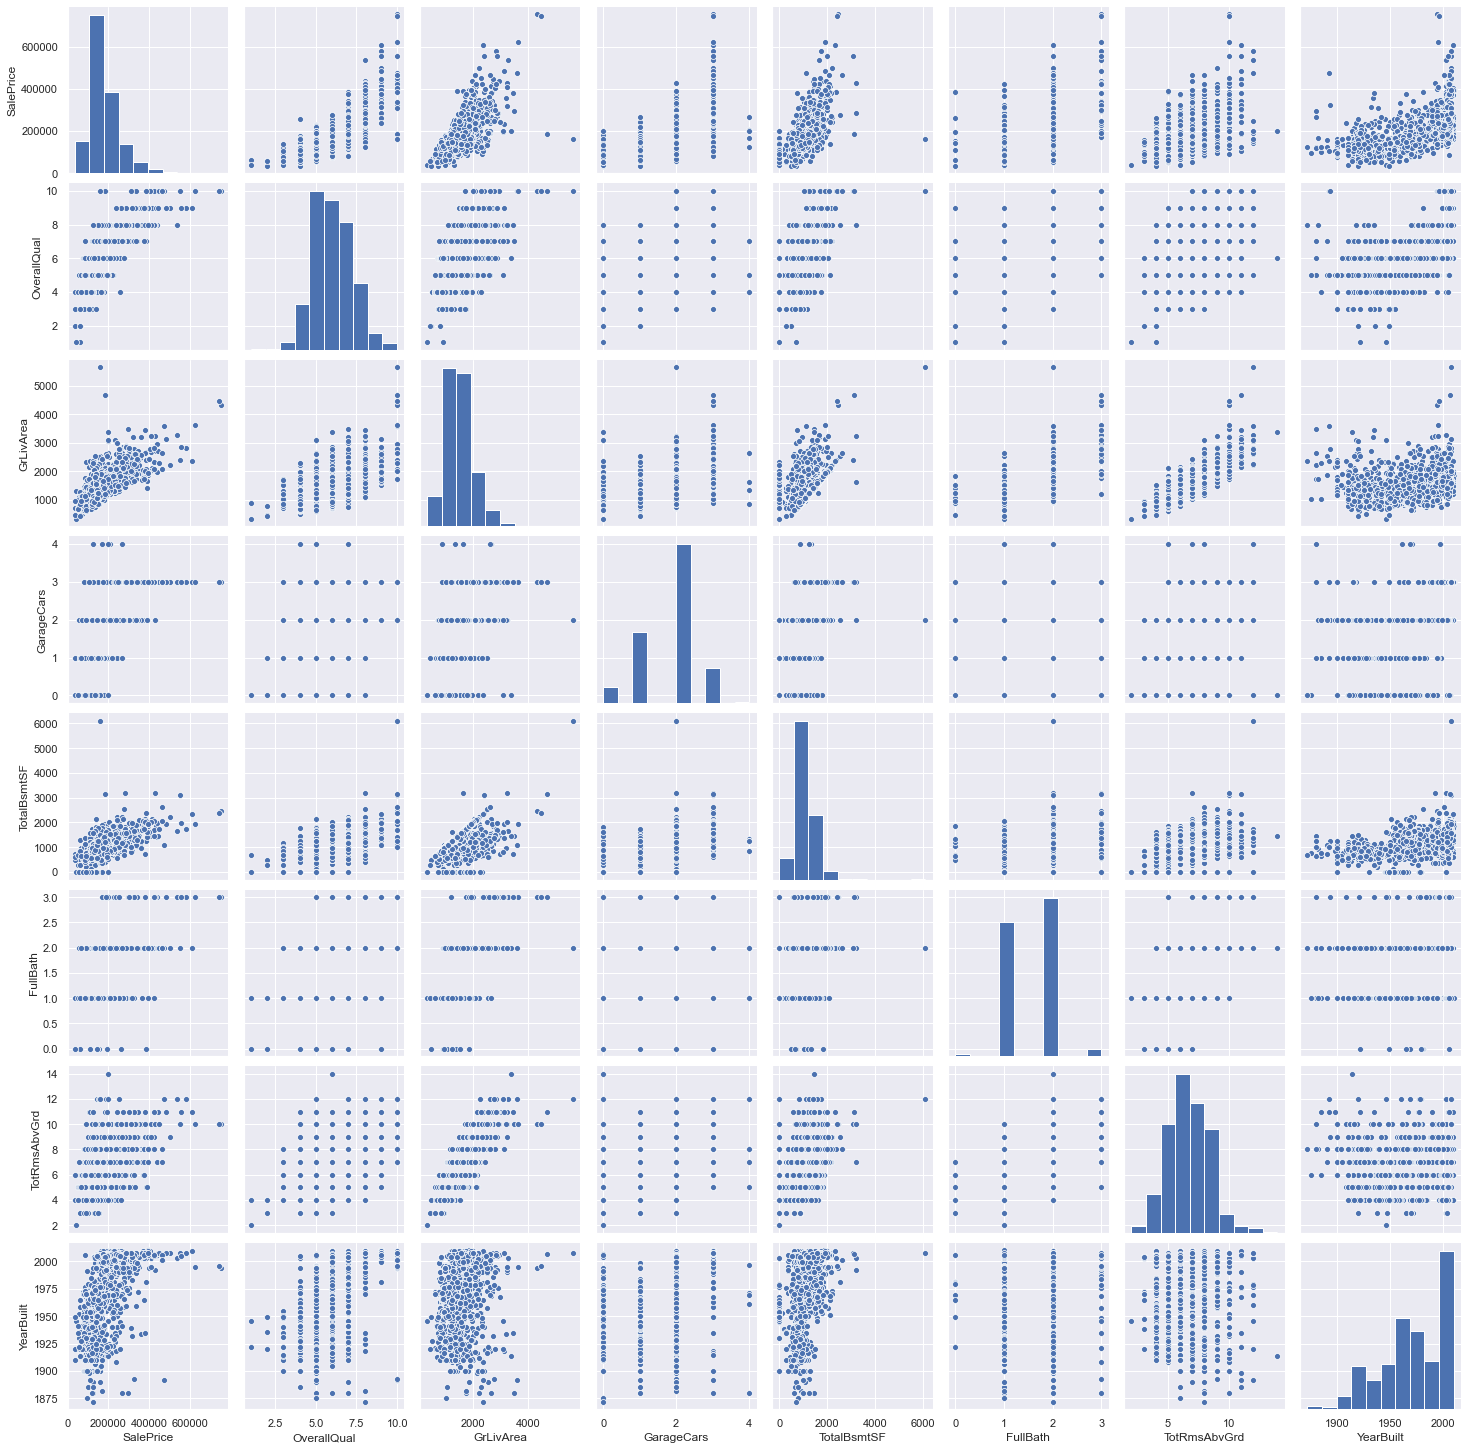

In [22]:
# scatterplot (pair plot) showing 7 features with more 0.5 r-value with Sales Price 

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show()

In [23]:
# Run simple Linear Regression
# Multiple Linear Regression
# Linear Regression with Regularization
# Find the feature combination that effect the sales price the most

# Linear Regression with 1 Variable

In this case, we will take the top numerical feature [OverallQual] to predict the SalesPrice 

### Define x and y

In [24]:
x = df['OverallQual'].values
# returns x = [7 6 7 ... 7 5 5]
# When training using LinearRegression(), the function expects a 2D array
# So reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
x = x.reshape(-1, 1)

y = df['SalePrice'].values

print(x)
print(y)

[[7]
 [6]
 [7]
 ...
 [7]
 [5]
 [5]]
[208500 181500 223500 ... 266500 142125 147500]


### Split the dataset into training and test set

In [25]:
# set random_state=0, so that every time we run the model, the result remains the same. 
# Setting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Train the model on the training set

In [26]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

### Predict the test set results 

In [27]:
y_predicted = linear_regression_model.predict(x_test)

### Evaluate the model

In [28]:
# set squared to False. If True returns MSE value, if False returns RMSE value.
rmse = mean_squared_error(y_test, y_predicted, squared=False)
# correlation between actual and predicted value
r2 = r2_score(y_test, y_predicted)


print('For Actual and Predicted Values:')
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

For Actual and Predicted Values:
Root mean squared error:  50724.44275356876
R2 score:  0.6274218081667629


### Plot the results

Text(0.5, 1.0, 'Actual vs Predicted Price')

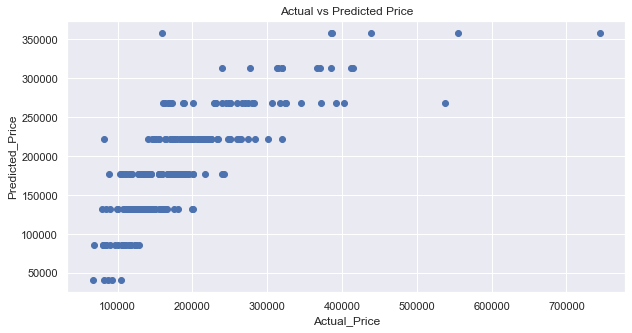

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual vs Predicted Price')

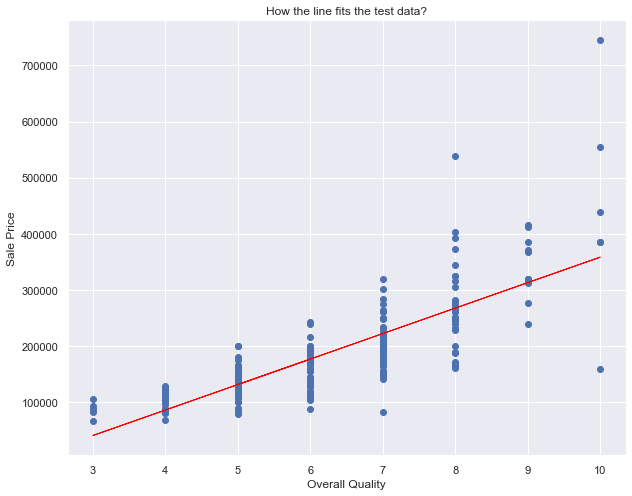

The correlation coefficient between the actual and the predicted price is:  0.7926208411118144
The correlation coefficient between overall quality and sale price is:  0.7926208411118145
There are the same.


In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, c='red', linewidth=1)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('How the line fits the test data?')
plt.show()

x_test_flat = [j for i in x_test for j in i]

# correlation between actual and predicted price
print('The correlation coefficient between the actual and the predicted price is: ', np.corrcoef(y_test, y_predicted)[0][1])
# correlation between overall quality and sale price
print('The correlation coefficient between overall quality and sale price is: ', np.corrcoef(x_test_flat, y_test)[0, 1])
print('There are the same.')

### Get P value from StatsModel

In [32]:
# Add y-intercept
y_test = sm.add_constant(y_test)

# Using Stats Model
sm_lr_model = sm.OLS(y_predicted, y_test)
sm_lr_results = sm_lr_model.fit()
print(sm_lr_results.summary())

# Get p value
p_val = sm_lr_results.pvalues[1]
print()
print('p-value: ', "{:.100f}".format(float(p_val)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     490.1
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.87e-64
Time:                        17:13:39   Log-Likelihood:                -3507.9
No. Observations:                 292   AIC:                             7020.
Df Residuals:                     290   BIC:                             7027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.049e+04   5626.383     12.528      0.0

## Linear Regression with 2 Variables 'OveralQual' and 'GrLivArea'
In this case, we will take the top 2 numerical features ['OveralQual', 'GrLivArea'] to predict SalePrice. And see if there is an improvement in R2.

Multiple linear regression formula:
### y = B0 + B1X1 + B2X2 + ... + BnXn + e


y = the predicted value of the dependent variable <br>
B0 = the y-intercept (value of y when all other parameters are set to 0) <br>
B1X1= the regression coefficient (B1) of the first independent variable (X1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)<br>
… = do the same for however many independent variables you are testing<br>
BnXn = the regression coefficient of the last independent variable<br>
e = model error (a.k.a. how much variation there is in our estimate of y)<br>
<br>
Reference: https://www.scribbr.com/statistics/multiple-linear-regression/

#### Model without using split test train method

x:     OverallQual  GrLivArea
0            7       1710
1            6       1262
y:  [208500 181500]

Coeffients are:  [32849.04744063    55.86222591]
y-intercept:  -104092.66963598118
number of features:  2
name of the features:  ['OverallQual' 'GrLivArea']
x:    OverallQual  GrLivArea
0            7       1710
1            6       1262
2            7       1786
y_predicted: [221375.0687487  163499.74410191 225620.5979176 ]

For Actual and Predicted Values:
Root mean squared error:  42457.61476765596
R2 score:  0.7141732234458849
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:45:49   Log-Likelihood:            

'#hides output'

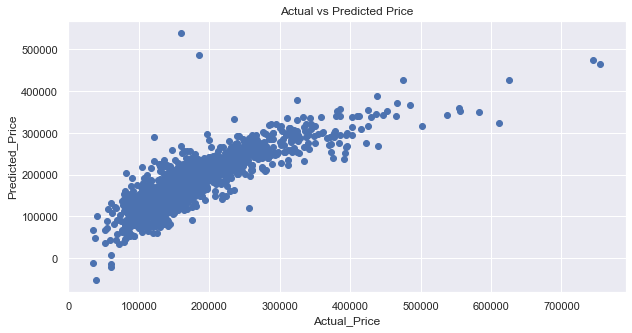

In [47]:
# Define input and predictor
x_2 = df[['OverallQual', 'GrLivArea']]
y_2 = df['SalePrice'].values

print('x: ', x_2[:2])
print('y: ', y_2[:2])

def ml_plot(x, y):
    # Train Test Split
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Train Model
    lr_model = LinearRegression()
    lr_model.fit(x, y)
    
    # Attributes
    coefficients = lr_model.coef_ 
    y_intercept = lr_model.intercept_
    n_features = lr_model.n_features_in_
    name_features = lr_model.feature_names_in_

    # Predict the Result
    y_predicted = lr_model.predict(x)

    # Evaluate the Result
    rmse = mean_squared_error(y, y_predicted, squared=False)
    # correlation between actual and predicted value
    r2 = r2_score(y, y_predicted)

    print()
    print('Coeffients are: ', coefficients)
    print('y-intercept: ', y_intercept)
    print('number of features: ', n_features)
    print('name of the features: ', name_features)
    print('x:', x[:3])
    print('y_predicted:', y_predicted[:3])
    
    print()
    print('For Actual and Predicted Values:')
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y, y_predicted)
    plt.xlabel('Actual_Price')
    plt.ylabel('Predicted_Price')
    plt.title('Actual vs Predicted Price')
    
    ##############################################################
    # StatsModel
    # Add y-intercept
    x = sm.add_constant(x)

    # Using Stats Model
    sm_lr_model = sm.OLS(y, x)

    sm_lr_y_predicted = sm_lr_model.fit()
    print(sm_lr_y_predicted.summary())
    ##############################################################

ml_plot(x_2, y_2)

; #hides output

## Linear Regression with 2 Variables 'OverallQual' and 'GarageCars'

Run a linear regression with a different feature pair, ['OveralQual', 'GarageCars']. And compare if the R2 score has improved from ['OverallQual', 'GrLivArea']


Coeffients are:  [36513.41781607 27489.18591479]
y-intercept:  -90362.42418647176
number of features:  2
name of the features:  ['OverallQual' 'GarageCars']
x:    OverallQual  GarageCars
0            7           2
1            6           2
2            7           2
y_predicted: [220209.87235559 183696.45453952 220209.87235559]

For Actual and Predicted Values:
Root mean squared error:  45731.47000261195
R2 score:  0.6683942516389318
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:45:56   Log-Likelihood:                -17738.
No. Observations:                1460   AIC:                         3.548e+04
Df Resi

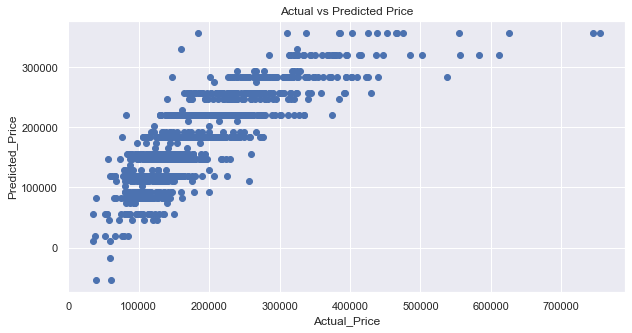

In [48]:
x_3 = df[['OverallQual', 'GarageCars']]
y_3 = df['SalePrice'].values

ml_plot(x_3, y_3)

### Evaluate the R2 score of many 'OverallQual' + 'Another Feature' pair

### Data is NOT split into train and test

In [54]:
# return the r2 object for 1 pair

def ml_pair(x, y):
    # Train Test Split
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    # Train Model
    lr_model = LinearRegression()
    lr_model.fit(x, y)
    
    # Attributes
    coefficients = lr_model.coef_ 
    y_intercept = lr_model.intercept_
    n_features = lr_model.n_features_in_
    name_features = lr_model.feature_names_in_

    # Predict the Result
    y_predicted = lr_model.predict(x)

    # Evaluate the Result
    rmse = mean_squared_error(y, y_predicted, squared=False)
    # correlation between actual and predicted value
    r2 = r2_score(y, y_predicted)
    
    result = {'features': list(name_features), 'rmse': rmse, 'r2': r2, 'num of features': n_features, 'y_intercept': y_intercept, 'coef': coefficients,'actual price': list(y), 'predicted price': list(y_predicted)}
    
    return result

# For example
ml_pair(x_3, y_3)
;

''

### Get the list of numerical features, to be made into feature pairs

In [55]:
# temporarily drop the columns with NAN values
num_f_df = df.dropna(axis='columns')

# list all the numerical features
numerical_features = num_f_df.select_dtypes(include=np.number).columns.tolist()

# subtract 'Id' and 'SalePrice' from list, which was the first and the last in the list
numerical_features = numerical_features[1:-1]

In [57]:
# make feature pairs 
f_pair = []

def feature_pair():
    for i in numerical_features:
        # since 'OverallQual' has the strongest correlation with 'SalePrice', will keep 'OverallQual' as the strongest feature
        if i != 'OverallQual':
            pair = ['OverallQual', i]
            f_pair.append(pair)
    
feature_pair()
print('First 3 Feature Pairs not in any order:', f_pair[0:3])

First 3 Feature Pairs not in any order: [['OverallQual', 'MSSubClass'], ['OverallQual', 'LotFrontage'], ['OverallQual', 'LotArea']]


### Feature Pair Results

In [58]:
# Get R2 for each feature pair
f_pair_result = []

# pair results
for pair in f_pair:
    x = df[pair]
    y = df['SalePrice'].values

    res = ml_pair(x, y)
    f_pair_result.append(res)
        
# print(f_pair_result)

f_pair_df = pd.DataFrame(f_pair_result)
f_pair_df = f_pair_df.sort_values(by=['r2'], ascending=False)
f_pair_df.head()

,features,rmse,r2,num of features,y_intercept,coef,actual price,predicted price
13,"[OverallQual, GrLivArea]",42457.614768,0.714173,2,-104092.669636,"[32849.04744062535, 55.86222590660746]","[208500, 181500, 223500, 140000, 250000, 14300...","[221375.06874869505, 163499.74410190954, 22562..."
10,"[OverallQual, 1stFlrSF]",43960.954447,0.693574,2,-117565.576758,"[37328.081899497425, 60.90608403354307]","[208500, 181500, 223500, 140000, 250000, 14300...","[195866.60447131694, 183266.39268943798, 19976..."
9,"[OverallQual, TotalBsmtSF]",45240.505265,0.675476,2,-97015.632952,"[37256.47142148742, 47.944447928571705]","[208500, 181500, 223500, 140000, 250000, 14300...","[204820.11442553843, 187029.08886305112, 20788..."
20,"[OverallQual, TotRmsAbvGrd]",45449.390551,0.672472,2,-136608.636822,"[39558.864428877656, 11698.388821103405]","[208500, 181500, 223500, 140000, 250000, 14300...","[233890.52474852183, 170934.88267743736, 21049..."
23,"[OverallQual, GarageArea]",45452.680083,0.672425,2,-90671.694981,"[36994.4243407147, 97.15469519018632]","[208500, 181500, 223500, 140000, 250000, 14300...","[221530.04836816833, 175986.01085071723, 22735..."


In [60]:
################################################
# StatsModel - get p-value
top_features = f_pair_df.iloc[0]['features']

sm_x = df[top_features]
sm_y = df['SalePrice'].values

# Add y-intercept
sm_x = sm.add_constant(sm_x)

# Using Stats Model
sm_lr_model = sm.OLS(sm_y, sm_x)

sm_lr_y_predicted = sm_lr_model.fit()
print(sm_lr_y_predicted.summary())

#################################################

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:56:51   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      

### Linear Regression with 3 Variables: 'OverallQual' + 'GrLivArea' + 'Another Variable'

We are going to approach this systematically - fixing the first 2 variables as [OverallQual, GrLivArea] as previously discovered and add a third variable from the list. 

In [61]:
# make feature pairs 
f_triples = []

# fix [OverallQual, GrLivArea] as first 2 variables and add a third one
for i in numerical_features:
    if i not in ['OverallQual', 'GrLivArea']:
        triple = ['OverallQual', 'GrLivArea', i]
        f_triples.append(triple)
    

print('Feature triples:', f_triples[0:3])

Feature triples: [['OverallQual', 'GrLivArea', 'MSSubClass'], ['OverallQual', 'GrLivArea', 'LotFrontage'], ['OverallQual', 'GrLivArea', 'LotArea']]


In [62]:
# Get R2 for each feature triple
f_triple_result = []

# pair results
for t in f_triples:
    x = df[t]
    y = df['SalePrice'].values

    res = ml_pair(x, y)
    f_triple_result.append(res)
    

f_triple_df = pd.DataFrame(f_triple_result)
f_triple_df = f_triple_df.sort_values(by=['r2'], ascending=False)

highest_triple = f_triple_df.iloc[0]['features']
print(highest_triple)

f_triple_df.head()

['OverallQual', 'GrLivArea', 'BsmtFinSF1']


,features,rmse,r2,num of features,y_intercept,coef,actual price,predicted price
6,"[OverallQual, GrLivArea, BsmtFinSF1]",40028.066660,0.745949,3,-102458.063365,"[30951.671340031524, 53.024326226497294, 32.09...","[208500, 181500, 223500, 140000, 250000, 14300...","[227534.63058712424, 181558.02697463662, 22450..."
9,"[OverallQual, GrLivArea, TotalBsmtSF]",40332.730229,0.742067,3,-103806.020634,"[28046.715327688606, 49.452629869359264, 36.61...","[208500, 181500, 223500, 140000, 250000, 14300...","[208427.4385898206, 173091.6421257916, 214529...."
22,"[OverallQual, GrLivArea, GarageArea]",40537.033689,0.739447,3,-99060.086775,"[27910.785081822232, 49.6493160766324, 72.9478...","[208500, 181500, 223500, 140000, 250000, 14300...","[221191.1499436708, 164618.0622491965, 229341...."
21,"[OverallQual, GrLivArea, GarageCars]",40566.415365,0.739069,3,-98832.493255,"[27104.825971531754, 50.67421141750022, 21298....","[208500, 181500, 223500, 140000, 250000, 14300...","[220152.10960476744, 170345.2369181956, 224003..."
10,"[OverallQual, GrLivArea, 1stFlrSF]",40649.384212,0.738001,3,-116111.086585,"[30462.9705299628, 43.191521006421205, 39.3710...","[208500, 181500, 223500, 140000, 250000, 14300...","[204688.8347197663, 170860.71281366344, 210491..."


In [65]:
################################################
# StatsModel - get p-value
top_features = f_triple_df.iloc[0]['features']

sm_x = df[top_features]
sm_y = df['SalePrice'].values

# Add y-intercept
sm_x = sm.add_constant(sm_x)

# Using Stats Model
sm_lr_model = sm.OLS(sm_y, sm_x)

sm_lr_y_predicted = sm_lr_model.fit()
print(sm_lr_y_predicted.summary())

#################################################

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1425.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:01:45   Log-Likelihood:                -17544.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1456   BIC:                         3.512e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.025e+05   4759.835    -21.526      

### Linear Regression with 3 Variables: 'OverallQual' + 'GrLivArea' + 'BsmtFinSF1' + 'Another Variable'

In [66]:
# Make multi feature lis
f_multi = []

for i in numerical_features:
    if i not in highest_triple:

        l = highest_triple.copy()
        l.insert(len(highest_triple), i)
        f_multi.append(l)

print(f_multi[0: 3])

[['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSSubClass'], ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'LotFrontage'], ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'LotArea']]


In [67]:
# Get R2 for each feature triple
f_multi_result = []

# pair results
for t in f_multi:
    x = df[t]
    y = df['SalePrice'].values

    res = ml_pair(x, y)
    f_multi_result.append(res)
    
f_multi_df = pd.DataFrame(f_multi_result)
f_multi_df = f_multi_df.sort_values(by=['r2'], ascending=False)

print('Best feature multi: ', f_multi_df.iloc[0]['features'])
f_multi_df.head()

Best feature multi:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars']


,features,rmse,r2,num of features,y_intercept,coef,actual price,predicted price
20,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars]",38400.358742,0.766190,4,-9.781387e+04,"[25888.241115785888, 48.53252611922561, 29.773...","[208500, 181500, 223500, 140000, 250000, 14300...","[225981.71767188454, 186449.22390536914, 22312..."
21,"[OverallQual, GrLivArea, BsmtFinSF1, GarageArea]",38726.063529,0.762207,4,-9.857286e+04,"[27179.78610695557, 48.34108624888752, 27.6645...","[208500, 181500, 223500, 140000, 250000, 14300...","[226534.05042687317, 179978.52611876876, 22769..."
4,"[OverallQual, GrLivArea, BsmtFinSF1, YearBuilt]",38779.584114,0.761550,4,-8.909356e+05,"[24812.08300902968, 58.525686052980646, 28.371...","[208500, 181500, 223500, 140000, 250000, 14300...","[235285.54699763528, 180750.02748199494, 23266..."
0,"[OverallQual, GrLivArea, BsmtFinSF1, MSSubClass]",38953.206570,0.759410,4,-9.161856e+04,"[30937.03193821213, 54.69609669941242, 30.2844...","[208500, 181500, 223500, 140000, 250000, 14300...","[226690.95035173194, 188261.3504741482, 224185..."
5,"[OverallQual, GrLivArea, BsmtFinSF1, YearRemod...",39181.792902,0.756578,4,-1.023685e+06,"[26784.076567750486, 54.15532185181502, 32.084...","[208500, 181500, 223500, 140000, 250000, 14300...","[232631.36474383797, 177458.86836942437, 22921..."


In [69]:
################################################
# StatsModel - get p-value
top_features = f_multi_df.iloc[0]['features']

sm_x = df[top_features]
sm_y = df['SalePrice'].values

# Add y-intercept
sm_x = sm.add_constant(sm_x)

# Using Stats Model
sm_lr_model = sm.OLS(sm_y, sm_x)

sm_lr_y_predicted = sm_lr_model.fit()
print(sm_lr_y_predicted.summary())

#################################################

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1192.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:02:44   Log-Likelihood:                -17483.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1455   BIC:                         3.500e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.781e+04   4586.554    -21.326      

## Linear Regression with Multiple Variables

Add more variables and see how R2 improves. Does the improvement taper off after a few additions? 

Rank the variable combinations. 

In [70]:
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### Output feature combinations and their rmse and r2_scores

In [71]:
def multi_reg(y):    
    
    f_combo = []
    highest_combo = []
    f_combo_result = []
    f_combo_compiled = []

    for combo in range(len(numerical_features)-1):

        f_combo.clear()
        f_combo_result.clear()

        # make feature combos
        for i in numerical_features:
            if len(highest_combo) == 0:
                highest_combo = ['OverallQual']
            if i not in highest_combo:
                l = highest_combo.copy()
                l.insert(len(highest_combo), i)
                f_combo.append(l)

        # run linear regression on each combo
        for c in f_combo:
            x = df[c]
            y = y

            res = ml_pair(x, y)
            f_combo_result.append(res)

        f_combo_result = sorted(f_combo_result, key=lambda i: i['r2'], reverse=True)
        f_combo_compiled.append(f_combo_result[0])
        highest_combo.append(f_combo_compiled[-1]['features'][-1])

    return f_combo_compiled

f_combo_compiled = multi_reg(df['SalePrice'].values)

f_combo_df = pd.DataFrame(f_combo_compiled, columns=['features', 'rmse', 'r2', 'num of features'])
f_combo_df = f_combo_df.sort_values(by=['r2'], ascending=False)
print('Best feature combo: ', f_combo_df.iloc[0]['features'])

Best feature combo:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'BsmtFullBath', 'TotalBsmtSF', 'KitchenAbvGr', 'YearRemodAdd', 'Fireplaces', 'PoolArea', 'FullBath', 'LowQualFinSF', 'YrSold', 'LotFrontage', '3SsnPorch', 'HalfBath', 'BsmtHalfBath', 'BsmtFinSF2', 'EnclosedPorch', 'MiscVal', 'OpenPorchSF', 'MoSold', 'GarageArea', '1stFlrSF', 'BsmtUnfSF']


In [72]:
pd.set_option('max_colwidth', None)
f_combo_df['r2 % improvement'] = f_combo_df['r2'].diff(periods=-1) / f_combo_df['r2'] * 100
f_combo_df['r2 % improvement'] = f_combo_df['r2 % improvement'].round(4)
f_combo_df

,features,rmse,r2,num of features,r2 % improvement
31,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF, MoSold, GarageArea, 1stFlrSF, BsmtUnfSF]",34709.154376,0.808980,33,0.0000
30,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF, MoSold, GarageArea, 1stFlrSF]",34709.154376,0.808980,32,0.0000
32,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF, MoSold, GarageArea, 1stFlrSF, BsmtUnfSF, 2ndFlrSF]",34709.154376,0.808980,34,0.0000
29,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF, MoSold, GarageArea]",34709.155398,0.808980,31,0.0002
28,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF, MoSold]",34709.283334,0.808978,30,0.0019
27,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal, OpenPorchSF]",34710.673026,0.808963,29,0.0022
26,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch, MiscVal]",34712.275309,0.808945,28,0.0028
25,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2, EnclosedPorch]",34714.368731,0.808922,27,0.0049
24,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath, BsmtFinSF2]",34717.945264,0.808883,26,0.0048
23,"[OverallQual, GrLivArea, BsmtFinSF1, GarageCars, MSSubClass, YearBuilt, BedroomAbvGr, OverallCond, LotArea, TotRmsAbvGrd, WoodDeckSF, ScreenPorch, BsmtFullBath, TotalBsmtSF, KitchenAbvGr, YearRemodAdd, Fireplaces, PoolArea, FullBath, LowQualFinSF, YrSold, LotFrontage, 3SsnPorch, HalfBath, BsmtHalfBath]",34721.490369,0.808844,25,0.0049


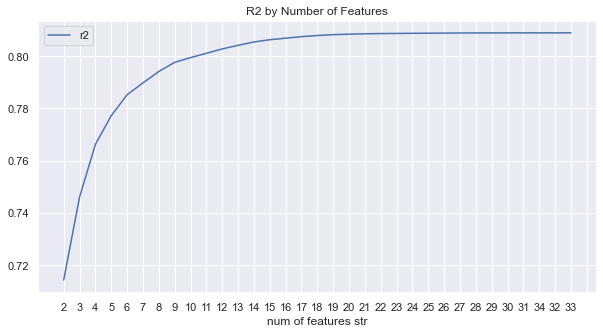

In [73]:
f_combo_df_copy = f_combo_df.copy()
f_combo_df_copy = f_combo_df_copy.sort_values(by=['r2'], ascending=True)
f_combo_df_copy['num of features str'] = f_combo_df_copy['num of features'].apply(str)

num_combo = len(numerical_features)
f_combo_df_copy.plot(x='num of features str', y='r2',figsize=(10, 5))
plt.xticks(np.arange(0, num_combo, step=1), f_combo_df_copy['num of features str'])
plt.title('R2 by Number of Features')
plt.show()

In [74]:
################################################
# StatsModel - get p-value
top_features = f_combo_df.iloc[0]['features']

sm_x = df[top_features]
sm_y = df['SalePrice'].values

# Add y-intercept
sm_x = sm.add_constant(sm_x)

# Using Stats Model
sm_lr_model = sm.OLS(sm_y, sm_x)

sm_lr_y_predicted = sm_lr_model.fit()
print(sm_lr_y_predicted.summary())

#################################################

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:04:09   Log-Likelihood:                -17336.
No. Observations:                1460   AIC:                         3.474e+04
Df Residuals:                    1427   BIC:                         3.491e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.014e+05   1.43e+06      0.351

### Conclusion

It is expected that the more features added to the list, the higher R2 would be. So it is not surprising that the 2nd largest feature list with 33 features has the highest R2 score. 

When looking at the 'R2 by Number of Features' graph, R2 score plateaus at around 16 features. 

The <b>P-Value</b> is very interesting here. As many are >5%, which indicate that they are not significant variables in this particular combination. 

## Log Transform 'SalePrice' 

Run the model again, but this time use log(SalesPrice) instead of the actual Sales Price. 

"When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work."
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

### Distribution of SalePrice without log transformation

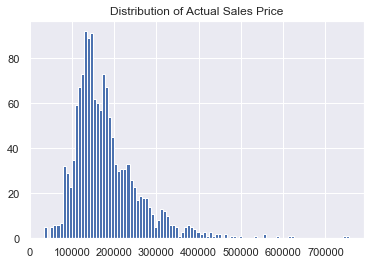

In [75]:
plt.hist(df['SalePrice'], bins=100)
plt.title('Distribution of Actual Sales Price')
plt.show()

### Distribution of SalePrice after log transformation

In [76]:
log_sp = np.log(df['SalePrice'])
print('log(SalePrice): ', log_sp[:5])

log(SalePrice):  0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


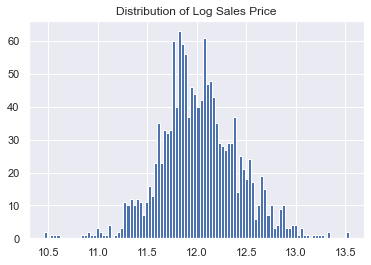

In [77]:
plt.hist(log_sp, bins=100)
plt.title('Distribution of Log Sales Price')
plt.show()

The log(SalePrice) distribution resemble bell curve better than the Actual Sale Price Curve and it is less skewed. 

### Run Multiple Regression with log(SalePrice)

In [78]:
f_combo_logsp_compiled = multi_reg(log_sp)

In [79]:
f_combo_logsp_df = pd.DataFrame(f_combo_logsp_compiled, columns=['features', 'rmse', 'r2', 'num of features'])
f_combo_logsp_df = f_combo_logsp_df.sort_values(by=['r2'], ascending=False)
f_combo_logsp_df

,features,rmse,r2,num of features
32,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1, BedroomAbvGr, MoSold, 2ndFlrSF, LowQualFinSF, BsmtFinSF2]",0.144881,0.868359,34
31,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1, BedroomAbvGr, MoSold, 2ndFlrSF, LowQualFinSF]",0.144881,0.868359,33
30,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1, BedroomAbvGr, MoSold, 2ndFlrSF]",0.144881,0.868359,32
29,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1, BedroomAbvGr, MoSold]",0.144881,0.868359,31
28,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1, BedroomAbvGr]",0.144885,0.868352,30
27,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal, BsmtFinSF1]",0.144889,0.868345,29
26,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF, MiscVal]",0.144900,0.868325,28
25,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea, OpenPorchSF]",0.144913,0.868300,27
24,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath, GarageArea]",0.144931,0.868268,26
23,"[OverallQual, GrLivArea, YearBuilt, OverallCond, GarageCars, TotalBsmtSF, Fireplaces, BsmtFullBath, MSSubClass, LotArea, YearRemodAdd, ScreenPorch, PoolArea, WoodDeckSF, FullBath, YrSold, EnclosedPorch, TotRmsAbvGrd, KitchenAbvGr, BsmtUnfSF, 3SsnPorch, HalfBath, 1stFlrSF, LotFrontage, BsmtHalfBath]",0.144949,0.868235,25


The highest R2 with Log(SalesPrice) is <b>0.868</b>. <br>
The highest R2 without Actual Sales Price is <b>0.809</b>. <br>
An improvement more than <b>7%</b>!

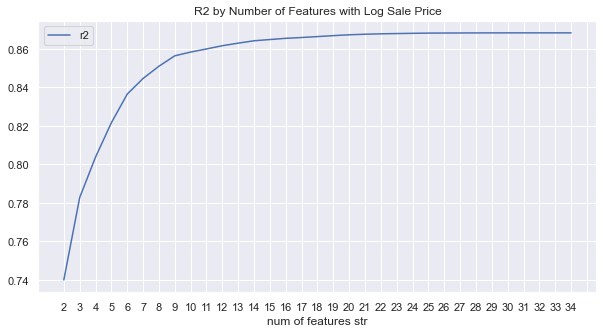

In [80]:
f_combo_logsp_df_copy = f_combo_logsp_df.copy()
f_combo_logsp_df_copy = f_combo_logsp_df_copy.sort_values(by=['r2'], ascending=True)
f_combo_logsp_df_copy['num of features str'] = f_combo_logsp_df_copy['num of features'].apply(str)

num_combo = len(numerical_features)
f_combo_logsp_df_copy.plot(x='num of features str', y='r2',figsize=(10, 5))
plt.xticks(np.arange(0, num_combo, step=1), f_combo_logsp_df_copy['num of features str'])
plt.title('R2 by Number of Features with Log Sale Price')
plt.show()

In [86]:
################################################
# StatsModel - get p-value
top_features = f_combo_logsp_df.iloc[0]['features']

sm_x = df[top_features]
sm_y = log_sp

# Add y-intercept
sm_x = sm.add_constant(sm_x)

# Using Stats Model
sm_lr_model = sm.OLS(sm_y, sm_x)

sm_lr_y_predicted = sm_lr_model.fit()
print(sm_lr_y_predicted.summary())

#################################################

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     294.2
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:50   Log-Likelihood:                 748.84
No. Observations:                1460   AIC:                            -1432.
Df Residuals:                    1427   BIC:                            -1257.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.0295      5.957      2.859

### Predicted vs Actual Sale Price using Actual Sale Price

In [87]:
sp_df = pd.DataFrame(f_combo_compiled, columns=['num of features', 'r2', 'actual price', 'predicted price'])
sp_df = sp_df.sort_values(by=['r2'], ascending=False)

# highest r2 score combo
best_r2_sp_df = sp_df.iloc[0]
# print(best_r2_sp_df)

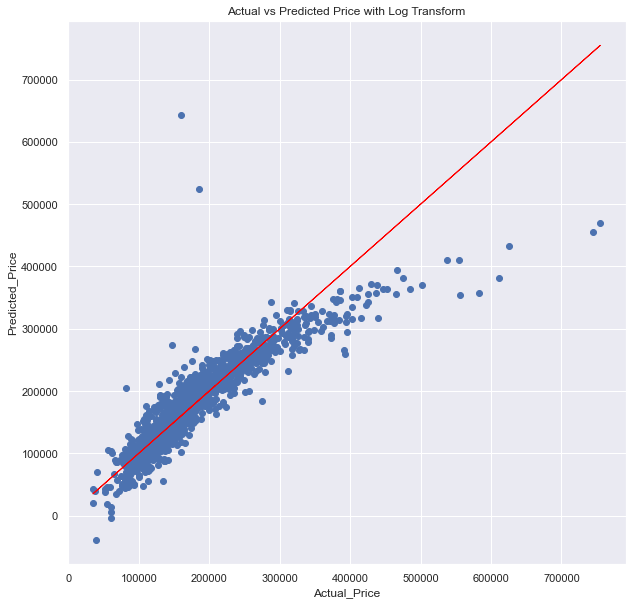

In [88]:
actual_sp = best_r2_sp_df['actual price']
predicted_sp = best_r2_sp_df['predicted price']

plt.figure(figsize=(10, 10))
plt.scatter(actual_sp, predicted_sp)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual vs Predicted Price with Log Transform')

plt.plot(actual_sp, actual_sp, c='red', linewidth=1)
plt.show()

Red line is the Actual Price.

### Predicted vs Actual Sale Price using Log Sale Price

In [89]:
logsp_df = pd.DataFrame(f_combo_logsp_compiled, columns=['num of features', 'r2', 'actual price', 'predicted price'])
logsp_df = logsp_df.sort_values(by=['r2'], ascending=False)

# highest r2 score combo
best_r2_logsp_df = logsp_df.iloc[0]

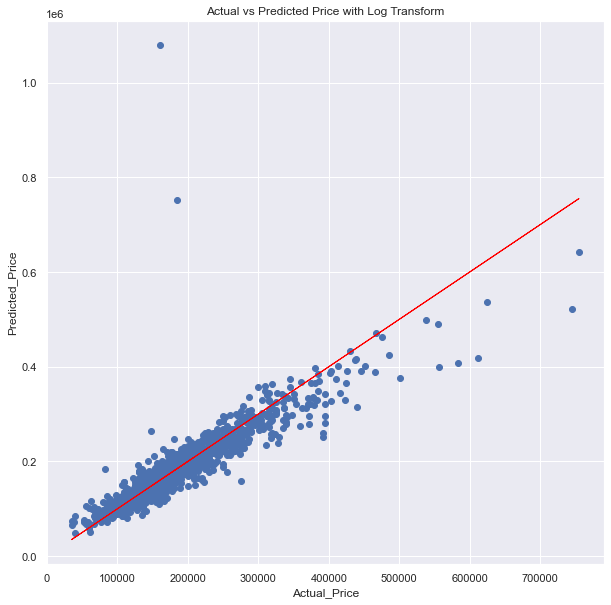

In [90]:
# reverse log price back to actual price

actual_logsp = np.exp(best_r2_logsp_df['actual price'])
predicted_logsp = np.exp(best_r2_logsp_df['predicted price'])

plt.figure(figsize=(10, 10))
plt.scatter(actual_logsp, predicted_logsp)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual vs Predicted Price with Log Transform')

plt.plot(actual_logsp, actual_logsp, c='red', linewidth=1)
plt.show()

#### Conclusion

The prediction with Log(SalePrice) is much more evenly distributed along the red line, the Actual Price. Where as the prediction with SalePrice is shaped slightly like a letter 'n'. It tends to under predict the houses in the low range (up to 100k) and over predict the houses in the mid range (100-300k), under predict the houses in the higher range(>300k). 

Definitely use log(SalePrice) in future predictions.



To Try:

Add 1 column at a time. Look to stop when the p-value of the last feature added is high. Check at which point R2 plateaus. 